In [14]:
import pandas as pd

df = pd.DataFrame()


datos = [6.5,5.0,5.6,7.6,4.8,8.0,7.5,7.9,8.0,9.2,
6.4,6.0,5.6,6.0,5.7,9.2,8.1,8.0,6.5,6.6,
5.0,8.0,6.5,6.1,6.4,6.6,7.2,5.9,4.0,5.7,
7.9,6.0,5.6,6.0,6.2,7.7,6.7,7.7,8.2,9.0]

df['datos'] = datos
df.head()

,datos
0,6.5
1,5.0
2,5.6
3,7.6
4,4.8


In [15]:
(df
  .groupby("datos")
  .agg(frequency=("datos", "count"))
  )

,frequency
datos,
4.0,1
4.8,1
5.0,2
5.6,3
5.7,2
5.9,1
6.0,4
6.1,1
6.2,1


In [16]:
rango = max(datos) - min(datos)
print(max(datos))
print(min(datos))

print(rango)

9.2
4.0
5.199999999999999


In [17]:
#Calcular el número de intervalos / numero optimo de grupos (fórmula de Sturges)
import math
k = 1+3.322*math.log10(len(datos))
k = math.floor(k)
print(k)

6


In [18]:
ancho_clase = rango/k
print(ancho_clase)

0.8666666666666666


In [19]:
#Ahora calculamos los intervalos
intervalos = []
inicio = 4.0

for i in range(k):
    intervalos.append((inicio,inicio+ancho_clase))
    inicio = inicio + ancho_clase

print(intervalos)

[(4.0, 4.866666666666666), (4.866666666666666, 5.7333333333333325), (5.7333333333333325, 6.599999999999999), (6.599999999999999, 7.466666666666665), (7.466666666666665, 8.333333333333332), (8.333333333333332, 9.2)]


In [52]:
import numpy as np
import pandas as pd


data = np.array(
[[6.5],[5.0],[5.6],[7.6],[4.8],[8.0],[7.5],[7.9],[8.0],
[9.2],[6.4],[6.0],[5.6],[6.0],[5.7],[9.2],[8.1],[8.0],
[6.5],[6.6],[5.0],[8.0],[6.5],[6.1],[6.4],[6.6],[7.2],
[5.9],[4.0],[5.7],[7.9],[6.0],[5.6],[6.0],[6.2],[7.7],
[6.7],[7.7],[8.2],[9.0]]
    )

datos = data.flatten()


freq = 1               # Amplitud de los intervalos
inf = datos.min()        # Limite inferior del primer intervalo
dif = (datos.min() - datos.max()) % freq or freq
sup = datos.max() + dif  # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    freq=ancho_clase,
    name="Intervalo"
    )

df = pd.DataFrame(index=intervals)
df["FreqAbs"] = pd.cut(datos, bins=df.index).value_counts()
df["Marca"]  = df.index.mid
df

,FreqAbs,Marca
Intervalo,,
"(4.0, 4.8667]",1,4.43335
"(4.8667, 5.7334000000000005]",7,5.30005
"(5.7334000000000005, 6.6001]",14,6.16675
"(6.6001, 7.466800000000001]",2,7.03345
"(7.466800000000001, 8.3335]",12,7.90015
"(8.3335, 9.2002]",3,8.76685


In [51]:
import math
from decimal import *

datos = [6.5,5.0,5.6,7.6,4.8,8.0,7.5,7.9,8.0,9.2,
6.4,6.0,5.6,6.0,5.7,9.2,8.1,8.0,6.5,6.6,
5.0,8.0,6.5,6.1,6.4,6.6,7.2,5.9,4.0,5.7,
7.9,6.0,5.6,6.0,6.2,7.7,6.7,7.7,8.2,9.0]

rango = max(datos) - min(datos)

k = 1+3.322*math.log10(len(datos))
k = math.floor(k)


ancho_clase = rango/k

ancho_clase = round(ancho_clase, 4)

freq = ancho_clase               # Amplitud de los intervalos
inf = min(datos)        # Limite inferior del primer intervalo
dif = (min(datos) - max(datos)) % freq or freq
sup = max(datos) + dif  # Limite superior del último intervalo

intervals = pd.interval_range(
    start=inf,
    end=sup,
    freq=freq,
    name="Intervalo",
    )

df = pd.DataFrame(index=intervals)
df["FreqAbs"] = pd.cut(datos, bins=df.index).value_counts()
df["Marca"]  = df.index.mid
df


,FreqAbs,Marca
Intervalo,,
"[4.0, 4.8667)",2,4.43335
"[4.8667, 5.7334000000000005)",7,5.30005
"[5.7334000000000005, 6.6001)",14,6.16675
"[6.6001, 7.466800000000001)",2,7.03345
"[7.466800000000001, 8.3335)",12,7.90015
"[8.3335, 9.2002)",3,8.76685


In [21]:
import numpy as np

#define matriz de datos
datos = np.array ([6.5,5.0,5.6,7.6,4.8,8.0,7.5,7.9,8.0,9.2,
6.4,6.0,5.6,6.0,5.7,9.2,8.1,8.0,6.5,6.6,
5.0,8.0,6.5,6.1,6.4,6.6,7.2,5.9,4.0,5.7,
7.9,6.0,5.6,6.0,6.2,7.7,6.7,7.7,8.2,9.0])

# calcular el rango intercuartílico  
q3, q1 = np.percentile(datos, [75, 25])
iqr = q3 - q1

#display rango intercuartílico 
print(iqr)
print(q1)
print(q3)

1.9250000000000007
5.975
7.9


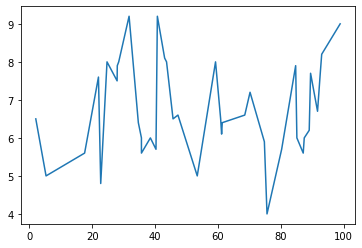

In [22]:
import matplotlib.pyplot as plt
import numpy as np
datos = [6.5,5.0,5.6,7.6,4.8,8.0,7.5,7.9,8.0,9.2,
6.4,6.0,5.6,6.0,5.7,9.2,8.1,8.0,6.5,6.6,
5.0,8.0,6.5,6.1,6.4,6.6,7.2,5.9,4.0,5.7,
7.9,6.0,5.6,6.0,6.2,7.7,6.7,7.7,8.2,9.0]

nivel1 = np.random.rand(40)*100
nivel1.sort()
plt.plot(nivel1,datos)

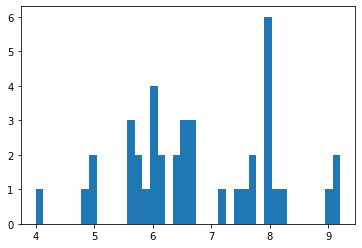

In [23]:
import numpy as np 
import matplotlib.pyplot as plt

data = datos
hist, bin_edges = np.histogram(data, 40)
plt.hist(data, bins=bin_edges)
plt.show()